In [ ]:
#movie Prediction

Yearly Movie Production Data:
      production_count
year                  
1980               131
1981               121
1982                94
1983               108
1984               109




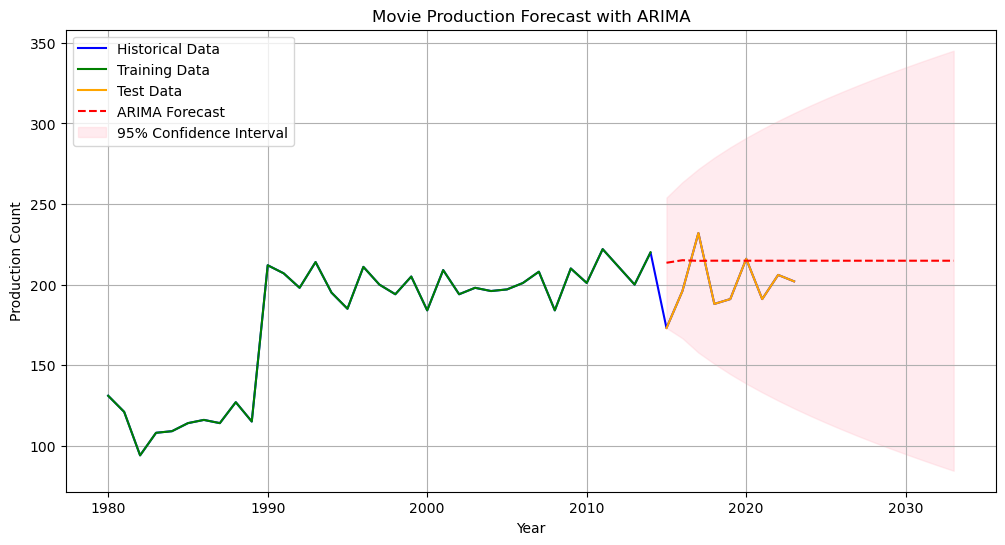

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

try:
    if 'movie_df' not in locals():
        # Creating a sample movie_df for demonstration
        movie_df = pd.DataFrame({
            'title_year': np.random.randint(1980, 2024, size=5000),
            'genres': np.random.choice(['Action', 'Comedy', 'Drama'], size=5000)
        })
    if 'netflix_df' not in locals():
        # Creating a sample netflix_df for demonstration
        netflix_df = pd.DataFrame({
            'release_year': np.random.randint(1990, 2024, size=3000),
            'genres': np.random.choice(['Action', 'Comedy', 'Drama'], size=3000)
        })
except NameError:
    # If a variable is completely undefined, create a placeholder
    movie_df = pd.DataFrame({'title_year': np.random.randint(1980, 2024, size=5000)})
    netflix_df = pd.DataFrame({'release_year': np.random.randint(1990, 2024, size=3000)})

# --- Data Preparation ---
# Aggregate yearly production counts from both datasets
imdb_years = movie_df['title_year'].dropna().astype(int)
netflix_years = netflix_df['release_year'].dropna().astype(int)

# Combine and count movie production by year
combined_years = pd.concat([imdb_years, netflix_years])
yearly_production = combined_years.value_counts().sort_index().reset_index()
yearly_production.columns = ['year', 'production_count']

# Filter for a reasonable date range
current_year = datetime.now().year
yearly_production = yearly_production[(yearly_production['year'] >= 1950) & (yearly_production['year'] <= current_year)]

# Set the year as the index for time series analysis
yearly_production['year'] = pd.to_datetime(yearly_production['year'], format='%Y')
yearly_production = yearly_production.set_index('year')
yearly_production.index = yearly_production.index.to_period('Y')

print("Yearly Movie Production Data:")
print(yearly_production.head())
print("\n" + "="*50 + "\n")

# --- Time Series Forecasting with ARIMA ---
# Note: For best results, you would use auto_arima from the pmdarima library
# to automatically find the best p, d, q parameters.
try:
    from statsmodels.tsa.arima.model import ARIMA

    # Split data into training and testing sets
    train_size = int(len(yearly_production) * 0.8)
    train_data = yearly_production[:train_size]
    test_data = yearly_production[train_size:]

  
    model = ARIMA(train_data, order=(1, 1, 1))
    fitted_model = model.fit()

    # Generate predictions for the test set and future years
    forecast_steps = len(test_data) + 10
    forecast = fitted_model.get_forecast(steps=forecast_steps)
    forecast_df = forecast.summary_frame()

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_production.index.to_timestamp(), yearly_production['production_count'], label='Historical Data', color='blue')
    plt.plot(train_data.index.to_timestamp(), train_data['production_count'], label='Training Data', color='green')
    plt.plot(test_data.index.to_timestamp(), test_data['production_count'], label='Test Data', color='orange')
    plt.plot(forecast_df.index.to_timestamp(), forecast_df['mean'], label='ARIMA Forecast', color='red', linestyle='--')
    plt.fill_between(forecast_df.index.to_timestamp(), forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3, label='95% Confidence Interval')

    plt.title('Movie Production Forecast with ARIMA')
    plt.xlabel('Year')
    plt.ylabel('Production Count')
    plt.legend()
    plt.grid(True)
    plt.show()

except ImportError:
    print("ARIMA model not available. Please install statsmodels: pip install statsmodels")


print("\n" + "="*50 + "\n")


